In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

# Load data

In [2]:
data = pd.read_csv("train.csv")
X = torch.from_numpy(data[["x1", "x2"]].values).to(torch.float32)
Y = torch.from_numpy(data["label"].values).to(torch.float32)

In [3]:
X.shape, Y.shape

(torch.Size([20, 2]), torch.Size([20]))

# Perceptron model

In [4]:
class TorchPerceptron:
    def __init__(self, num_features):
        self.n = num_features
        self.weights = torch.rand(self.n)
        self.bias = torch.rand(1)
    
    def forward(self, x):
        result = x.matmul(self.weights.T) + self.bias
        y_cap = torch.where(result > 0, 1, 0)
        return y_cap
    
    def update(self, x, y, lr):
        y_cap = self.forward(x)
        error = y - y_cap
        self.bias += (lr*error)
        self.weights += (lr * error * x)
        return error

# Training

In [5]:
def train(model, all_x, all_y, epoch, learning_rate):
    for i in range(epoch):
        error_count = 0
        for x,y in zip(all_x, all_y):
            error_count += abs(model.update(x,y,learning_rate))
        print(f"Epoch : {i+1}, Error Count : {error_count}")

In [6]:
ppn = TorchPerceptron(num_features=2)

In [7]:
print(f"Before Training - Weights : {ppn.weights}, Bias : {ppn.bias}\n")
train(ppn, X, Y, epoch=5, learning_rate=0.3)
print(f"\nAfter Training - Weights : {ppn.weights}, Bias : {ppn.bias}")

Before Training - Weights : tensor([0.6750, 0.3444]), Bias : tensor([0.5635])

Epoch : 1, Error Count : tensor([2.])
Epoch : 2, Error Count : tensor([2.])
Epoch : 3, Error Count : tensor([0.])
Epoch : 4, Error Count : tensor([0.])
Epoch : 5, Error Count : tensor([0.])

After Training - Weights : tensor([0.4110, 0.1644]), Bias : tensor([-0.6365])


/var/folders/m5/xgbg_j9n4lj22vhdl_zqqlzm0000gn/T/ipykernel_53163/2989860873.py:8: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670918965162/work/aten/src/ATen/native/TensorShape.cpp:3542.)
  result = x.matmul(self.weights.T) + self.bias


# Data to predict

In [8]:
X_data = torch.tensor([
    [-1.0, -2.0],
    [-3.0, 4.5],
    [5.0, 6.0]
])
ppn.forward(X_data)

tensor([0, 0, 1])

# Accuracy

In [9]:
def measure_accuracy(model, X, Y):
    correct_prediction = 0
    for x, y in zip(X,Y):
        y_cap = model.forward(x)
        correct_prediction += (y == y_cap)
    return correct_prediction/len(X)

In [10]:
print(f"Accuracy : {measure_accuracy(ppn, X, Y) * 100}%")

Accuracy : tensor([100.])%


# Visualisation of decision boundary

In [11]:
def visualize(model, X, Y):
    plt.plot(X[Y==0, 0], X[Y==0, 1], marker="D", markersize=8, linestyle='', label="Class-0")
    plt.plot(X[Y==1, 0], X[Y==1, 1], marker="^", markersize=10, linestyle='', label="Class-1")
    
    plt.legend(loc=2)
    
    plt.xlabel("Feature x1")
    plt.ylabel("Feature x2")  
    
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    
    # Decision boundary
    x1_min = -20
    x1_max = 20
    x2_min = -(x1_min * ppn.weights[0] + ppn.bias)/ppn.weights[1]
    x2_max = -(x1_max * ppn.weights[0] + ppn.bias)/ppn.weights[1]
    plt.plot([x1_min, x2_min], [x1_max, x2_max])

/Users/muhammadwaseem/miniconda3/envs/torch/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


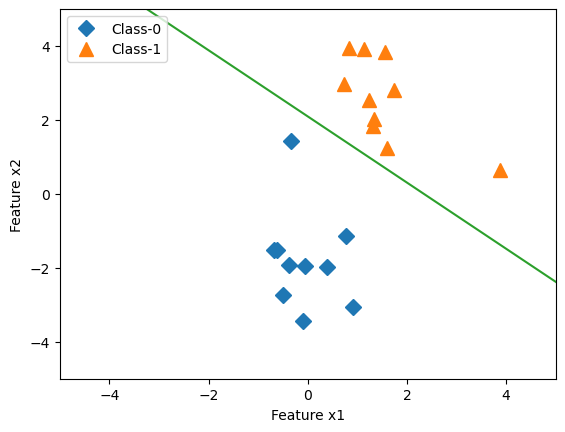

In [12]:
visualize(ppn, X, Y)